In [ ]:
import torch
from torch import nn #contains all of pytorch building block
import matplotlib.pyplot as plt


In [ ]:
#create known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10], len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
# splitting data into test and train
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
# visulize data
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels =y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b",s=4, label = "Training data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g",s=4, label="Testing data")

  if predictions is not None:
    # are there predictions
    plt.scatter(test_data, predictions, c="r",s=4,label="predictions")

  plt.legend(prop={"size":14});



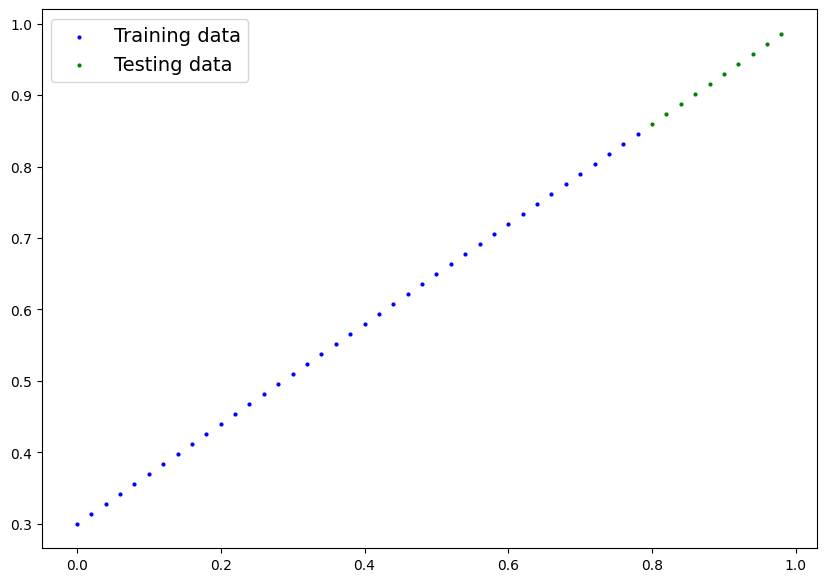

In [ ]:
plot_predictions()

In [ ]:
# building model
from torch import nn #nn stands for nueral network
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True,
                                         dtype = torch.float))

    #forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x +self.bias




In [ ]:
from operator import methodcaller
###pytorch model building essentials
# torch.nn - contains all of the building block for computational graphs (neural networks)
# torch.nn.Parameter - what parameters should our model try and learn
# torch.nn.Model - the base class of all nn models. if you subclass then you should use forward method
# torch.optim - this is where optimizer live and helps in gradient descent
# def foward() - all nn.Model subclasses require you to override forward methodcaller


In [ ]:
##checking the content of pytorch model


#create a random seed

torch.manual_seed(42)

#instance of a model

model_0 = LinearRegressionModel()

model_0 # so it contains the model itself

LinearRegressionModel()

In [ ]:
model_0.parameters()
#by default this is a generator object and we should convert it
list(model_0.parameters())
# the output should contain actual values set for weights and bias


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias
#goal is to get the parameters as close as possible to these values

(0.7, 0.3)

In [ ]:
## making prediction using 'torch.inference_mode()'

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

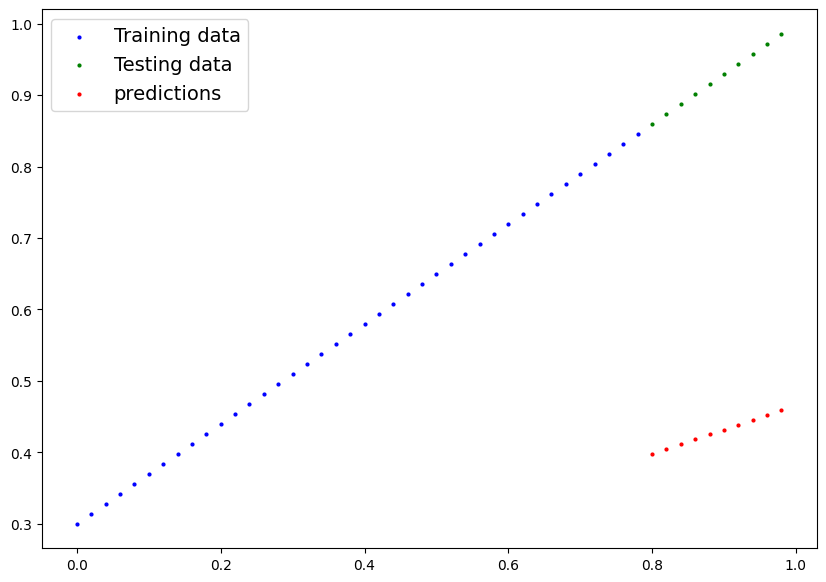

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from torch.nn.modules.container import ParameterList
# Training model
# moving from unknown paramters to some known parameters
# what we need - 1 loss function 2 optimizer 3 training loop 4 testing loop


# setup loss function - ideally choose the function based on problem statement
loss_fn = nn.L1Loss()

# setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)





# Building a  training loop
# forward pass
# calculate the loss
# optimizer zero grad
# loss backward
# optimizer step

In [ ]:
# to track the progress of the model

epoch_count =[]
loss_values = []
test_loss_values = []

# An epoch is one loop through the data

epochs = 200

####Training
# loop through the data
for epoch in range(epochs):
  # set the model in training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients



  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on loss wrt to the parameters of model
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optimizer.step()


  model_0.eval() # turns off different settings that are not needed for evaluation
  with torch.inference_mode(): #turns off gradient tracking

    # 1 do forward pass for testing
    test_pred = model_0(X_test)
    # 2 Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epock: {epoch} | loss: {loss} | Test loss:{test_loss}")
    print(model_0.state_dict())


Epock: 0 | loss: 0.31288138031959534 | Test loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epock: 10 | loss: 0.1976713240146637 | Test loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epock: 20 | loss: 0.08908725529909134 | Test loss:0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epock: 30 | loss: 0.053148526698350906 | Test loss:0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epock: 40 | loss: 0.04543796554207802 | Test loss:0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epock: 50 | loss: 0.04167863354086876 | Test loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epock: 60 | loss: 0.03818932920694351 | Test loss:0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [ ]:
epoch_count,loss_values,test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [ ]:
#now after running model few times let's make some predictions
with torch.inference_mode():
  y_preds_new = model_0(X_test)

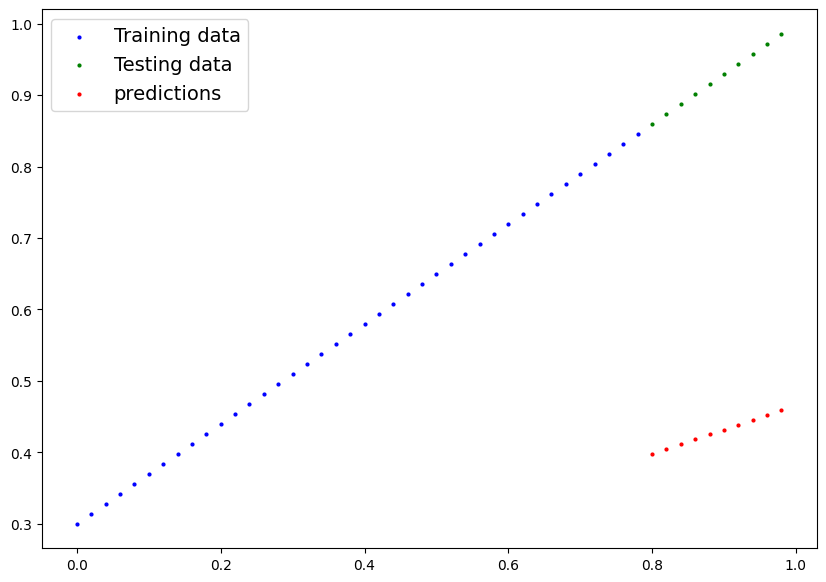

In [ ]:
plot_predictions(predictions = y_preds)

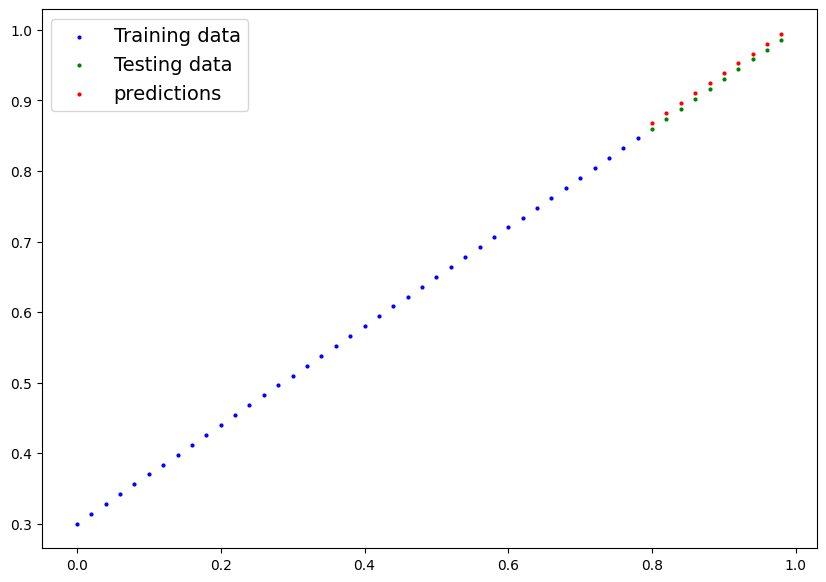

In [ ]:
 plot_predictions(predictions=y_preds_new)

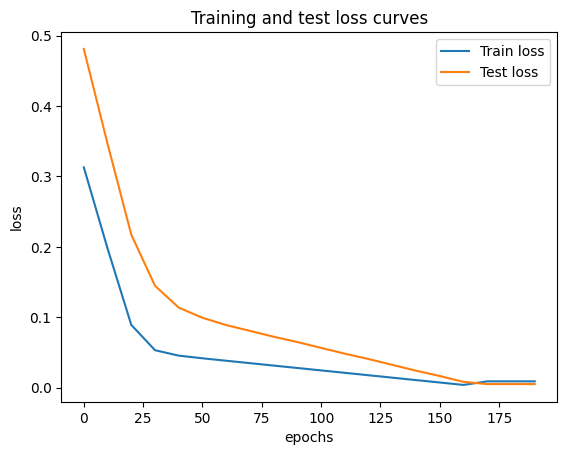

In [ ]:
plt.plot(epoch_count,torch.tensor(loss_values).numpy(),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()

In [ ]:
#saving the model when the model is working perfectly

# 3 main methods to save and load

